In [1]:
import dictdiffer
import itertools
import json
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import os
import pandas as pd
import pathlib
import pprint
import seaborn as sns
import scipy.special as sp
import sys

from collections import defaultdict
from typing import *

In [55]:
CSV_FILES = {
  '0.5': '../../data/no-drug-homogeneous-phase-transition/N5000-c0.5/derived/hamming-distances-1749569615990.csv',
  '0.9': '../../data/no-drug-homogeneous-phase-transition/N5000-c0.9/derived/hamming-distances-1749521593430.csv',
  '0.99': '../../data/no-drug-homogeneous-phase-transition/N5000-c0.99/derived/hamming-distances-1749521667829.csv',
}

In [60]:
f = lambda c: (1-c)
steady_state_hamming_distance_0_df = pd.read_csv(CSV_FILES['0.5'])
steady_state_hamming_distance_0_df['correlation'] = 0.5
steady_state_hamming_distance_0_df['normalized_hamming_distance'] = steady_state_hamming_distance_0_df['hamming_distance'] / 1# f(0.5) # steady_state_hamming_distance_0_df[
  # steady_state_hamming_distance_0_df['expected_connectivity'] == steady_state_hamming_distance_0_df['expected_connectivity'].min()
# ]['hamming_distance'].mean()

steady_state_hamming_distance_9_df = pd.read_csv(CSV_FILES['0.9'])
steady_state_hamming_distance_9_df['correlation'] = .9
steady_state_hamming_distance_9_df['normalized_hamming_distance'] = steady_state_hamming_distance_9_df['hamming_distance'] / 1 # f(0.9) # steady_state_hamming_distance_9_df[
  # steady_state_hamming_distance_9_df['expected_connectivity'] == steady_state_hamming_distance_9_df['expected_connectivity'].min()
# ]['hamming_distance'].mean()

steady_state_hamming_distance_99_df = pd.read_csv(CSV_FILES['0.99'])
steady_state_hamming_distance_99_df['correlation'] = .99
steady_state_hamming_distance_99_df['normalized_hamming_distance'] = steady_state_hamming_distance_99_df['hamming_distance'] /1# f(0.99) # steady_state_hamming_distance_99_df[
  # steady_state_hamming_distance_99_df['expected_connectivity'] == steady_state_hamming_distance_99_df['expected_connectivity'].min()
# ]['hamming_distance'].mean()

steady_state_hamming_distance_df = pd.concat([
  steady_state_hamming_distance_0_df,
  steady_state_hamming_distance_9_df,
  steady_state_hamming_distance_99_df
], ignore_index=True)

In [41]:
f(0), f(0.9), f(0.99)

(0.5, 0.050000000000000044, 0.0050000000000000044)

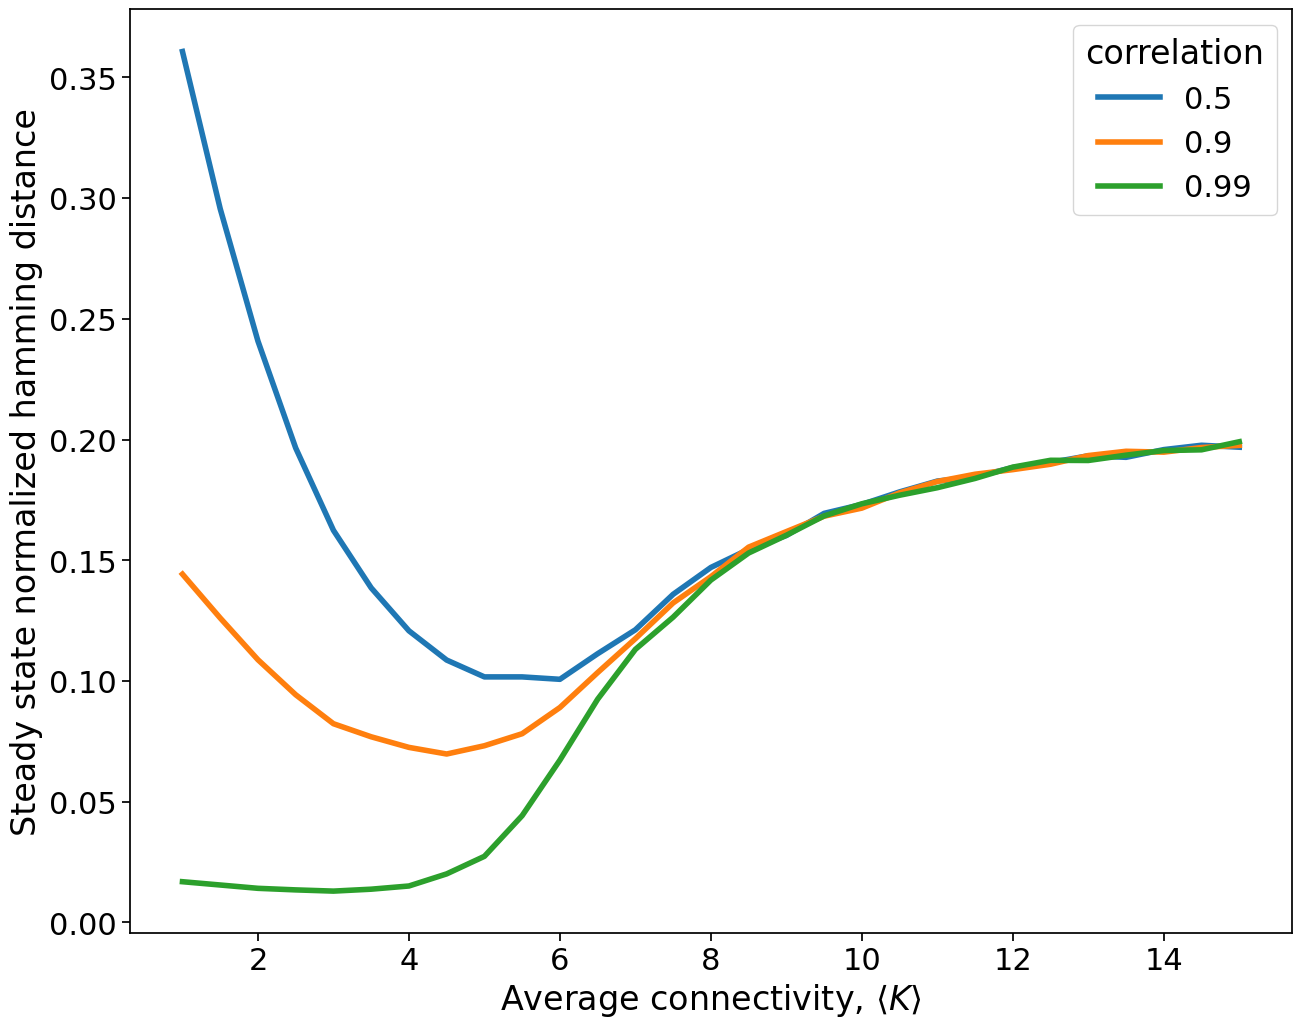

In [61]:
with sns.plotting_context('notebook', font_scale=2.0):
  fig, ax = plt.subplots(figsize=(15, 12))
  g = sns.lineplot(
    data=steady_state_hamming_distance_df,
    x='expected_connectivity',
    y='normalized_hamming_distance',
    legend=True,
    hue='correlation',
    palette='tab10',
    lw=4,
    ax=ax
  )
  g.set(xlabel='Average connectivity, $\\langle K \\rangle$', ylabel='Steady state normalized hamming distance')

In [32]:
g.figure.savefig(
  '../../plots/no-drug-homogeneous-phase-transition-elbow-correlations-full.png',
  bbox_inches='tight',
  dpi=300,
)

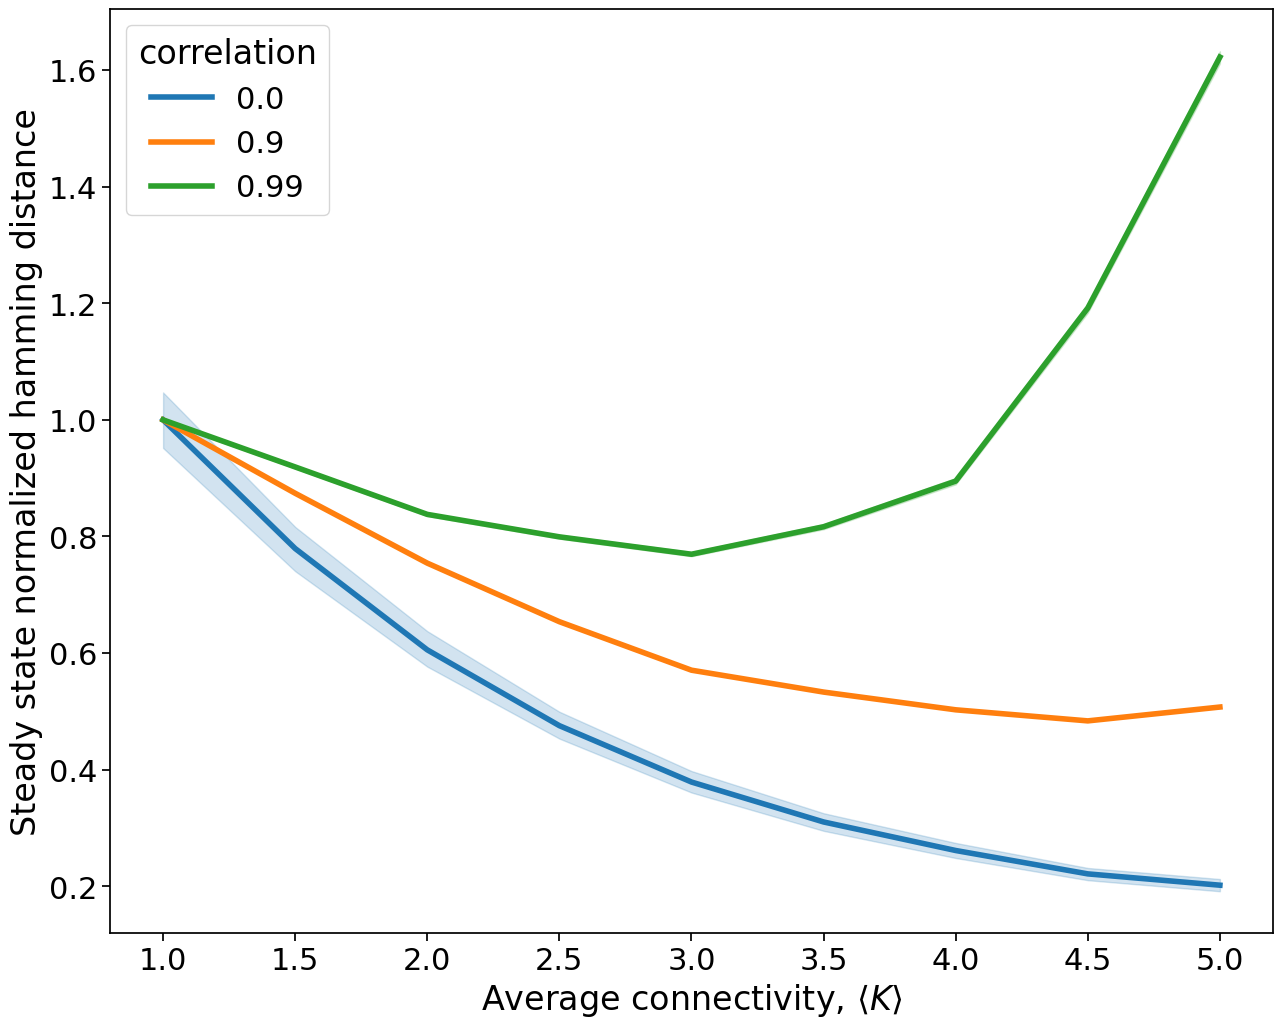

In [25]:
with sns.plotting_context('notebook', font_scale=2.0):
  fig, ax = plt.subplots(figsize=(15, 12))
  h = sns.lineplot(
    data=steady_state_hamming_distance_df[steady_state_hamming_distance_df['expected_connectivity'] <= 5],
    x='expected_connectivity',
    y='normalized_hamming_distance',
    legend=True,
    hue='correlation',
    palette='tab10',
    lw=4,
    ax=ax
  )
  h.set(xlabel='Average connectivity, $\\langle K \\rangle$', ylabel='Steady state normalized hamming distance')

In [26]:
h.figure.savefig(
  '../../plots/no-drug-homogeneous-phase-transition-elbow-correlations-cutoff.png',
  bbox_inches='tight',
  dpi=300
)